In [145]:
import pandas as pd
import sqlite3
from funcs import turnaround_in_seconds, makespan_in_seconds
from datetime import datetime, timedelta

In [146]:
opt_db = sqlite3.connect('mixed/optimus.sqlite')
eff_db = sqlite3.connect('mixed/elastic_fifo.sqlite')
nef_db = sqlite3.connect('mixed/non_elastic_fifo.sqlite')
oasis_best_db = sqlite3.connect('mixed/oasis_best_fit.sqlite')
oasis_first_db = sqlite3.connect('mixed/oasis_first_fit.sqlite')

optimus = pd.read_sql_query("SELECT * FROM job", opt_db)
elastic = pd.read_sql_query("SELECT * FROM job", eff_db)
nelastic = pd .read_sql_query("SELECT * FROM job", nef_db)
oasis_best = pd.read_sql_query("SELECT * FROM job", oasis_best_db)

# get the job in oasis_best with status "Running", and add `started_at + 105.8500411111111` to `completed_at`
oasis_best.loc[oasis_best['status'] == 'Running', 'completed_at'] = datetime.strptime(oasis_best.loc[oasis_best['status'] == 'Running', 'started_at'].values[0], '%Y-%m-%d %H:%M:%S.%f') + timedelta(seconds=105.8500411111111)

# set it back datetime to string
oasis_best.loc[oasis_best['status'] == 'Running', 'completed_at'] = str(oasis_best.loc[oasis_best['status'] == 'Running', 'completed_at'].values[0])

# set the status of jobs with status "Running" to "Completed"
oasis_best.loc[oasis_best['status'] == 'Running', 'status'] = 'Completed'

oasis_first = pd.read_sql_query("SELECT * FROM job", oasis_first_db)

In [147]:
# from datetime import datetime
# oasis_best_four_gpus = oasis_best[(oasis_best['required_gpus'] == 4) & (oasis_best['status'] == "Completed")]
# oasis_best_four_gpus

# avg_duration = list()
# for i in range(len(oasis_best_four_gpus)):
#     start = datetime.strptime(oasis_best_four_gpus.iloc[i]['started_at'], '%Y-%m-%d %H:%M:%S.%f')
#     end = datetime.strptime(oasis_best_four_gpus.iloc[i]['completed_at'], '%Y-%m-%d %H:%M:%S.%f')
#     avg_duration.append((end - start).total_seconds())
    
# print(f"Average duration: {sum(avg_duration)/len(avg_duration)}")

In [148]:
oasis_best_makespan = [
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][0]),
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][4]),
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][9]),
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][14]), 
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][19]), 
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][24]), 
  makespan_in_seconds(oasis_best['started_at'][0], oasis_best['completed_at'][29])
]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(oasis_best['started_at'][i], oasis_best['completed_at'][i]))

oasis_best_turnaround = [
  sum(turnaround[0:1])/1, 
  sum(turnaround[0:5])/5, 
  sum(turnaround[0:10])/10, 
  sum(turnaround[0:15])/15, 
  sum(turnaround[0:20])/20, 
  sum(turnaround[0:25])/25, 
  sum(turnaround[0:30])/30
]

In [149]:
oasis_first_makespan = [
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][4]), 
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][14]), 
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][10]), 
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][14]),
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][19]), 
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][24]), 
  makespan_in_seconds(oasis_first['started_at'][0], oasis_first['completed_at'][29])
]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(oasis_first['started_at'][i], oasis_first['completed_at'][i]))

oasis_first_turnaround = [
  sum(turnaround[0:1])/1, 
  sum(turnaround[0:5])/5, 
  sum(turnaround[0:10])/10,
  sum(turnaround[0:15])/15, 
  sum(turnaround[0:20])/20, 
  sum(turnaround[0:25])/25, 
  sum(turnaround[0:30])/30
]

In [150]:
optimus_makespan = [
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][0]), 
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][4]), 
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][9]),
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][14]), 
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][19]), 
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][24]), 
  makespan_in_seconds(optimus['started_at'][0], optimus['completed_at'][29])
]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(optimus['started_at'][i], optimus['completed_at'][i]))

optimus_turnaround = [
  sum(turnaround[0:1])/1, 
  sum(turnaround[0:5])/5,
  sum(turnaround[0:10])/10,
  sum(turnaround[0:15])/15, 
  sum(turnaround[0:20])/20, 
  sum(turnaround[0:25])/25, 
  sum(turnaround[0:30])/30
]

In [151]:
elastic_makespan = [
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][0]), 
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][4]), 
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][9]),
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][14]), 
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][19]), 
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][24]), 
  makespan_in_seconds(elastic['started_at'][0], elastic['completed_at'][29])
]

turnaround = list()
for i in range(1,30):
  turnaround.append(turnaround_in_seconds(elastic['started_at'][i], elastic['completed_at'][i]))

elastic_turnaround = [
  sum(turnaround[0:1])/1, 
  sum(turnaround[0:5])/5, 
  sum(turnaround[0:10])/10,
  sum(turnaround[0:15])/15, 
  sum(turnaround[0:20])/20, 
  sum(turnaround[0:25])/25, 
  sum(turnaround[0:30])/30
]

In [152]:
nonelasitc_makespan = [
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][0]), 
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][4]), 
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][9]),
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][14]), 
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][19]), 
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][24]),
    makespan_in_seconds(nelastic['started_at'][0], nelastic['completed_at'][29])
]

turnaround = list()
for i in range(1,30):
    turnaround.append(turnaround_in_seconds(nelastic['started_at'][i], nelastic['completed_at'][i]))

nonelastic_turnaround = [
    sum(turnaround[0:1])/1, 
    sum(turnaround[0:5])/5,
    sum(turnaround[0:10])/10,
    sum(turnaround[0:15])/15, 
    sum(turnaround[0:20])/20, 
    sum(turnaround[0:25])/25, 
    sum(turnaround[0:30])/30
]

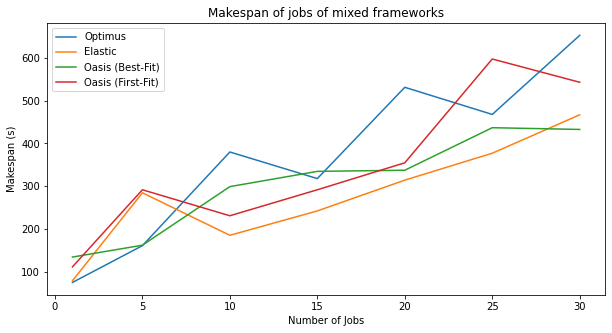

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot([1,5,10,15,20,25,30], optimus_makespan, label='Optimus')
plt.plot([1,5,10,15,20,25,30], elastic_makespan, label='Elastic')
plt.plot([1,5,10,15,20,25,30], oasis_best_makespan, label='Oasis (Best-Fit)')
plt.plot([1,5,10,15,20,25,30], oasis_first_makespan, label='Oasis (First-Fit)')
plt.title("Makespan of jobs of mixed frameworks")
plt.xlabel('Number of Jobs')
plt.ylabel('Makespan (s)')
plt.legend()
plt.show()

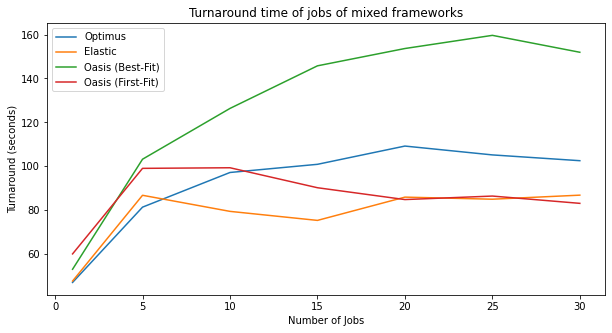

In [159]:
plt.figure(figsize=(10,5))
plt.plot([1, 5, 10, 15, 20, 25, 30], optimus_turnaround, label='Optimus')
plt.plot([1, 5, 10, 15, 20, 25, 30], elastic_turnaround, label='Elastic')
plt.plot([1, 5, 10, 15, 20, 25, 30], oasis_best_turnaround, label='Oasis (Best-Fit)')
plt.plot([1, 5, 10, 15, 20, 25, 30], oasis_first_turnaround, label='Oasis (First-Fit)')
plt.xlabel('Number of Jobs')
plt.ylabel('Turnaround (seconds)')
plt.title("Turnaround time of jobs of mixed frameworks")
plt.legend()
plt.show()